# Fe 6302 flare 2014 

## Useless because only 1 wavelength Not doing our normal analysis!!

In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection
import sys
sys.path.append('D:/solar flares/data/2017-09-06')
import use_nessi3 as un


In [1]:
import os

# Specify the path to the folder you want to list files from
folder_path = "D:/solar flares/data/2014-09-06/fits/Fe/"
"D:\solar flares\data\2014-09-06\fits\Fe\crisp_l2_20140906_152724_6302_r00564.fits"
ntime = 618
print(f"number of indices: {ntime}")

def timeframe_to_filename_fits(frame):
    if frame <0 or frame >= ntime:
        raise IndexError(f'frame number {frame} is not in (0, {ntime}).')
    else:
        return f"{folder_path}\crisp_l2_20140906_152724_6302_r00{frame:03d}.fits"
ttff = timeframe_to_filename_fits



number of indices: 618


In [3]:
head0 = f.getheader(ttff(0))
head0, head0["DATE-AVG"]

(SIMPLE  =                    T / Written by IDL:  Sun Nov 19 15:11:12 2017      
 BITPIX  =                   16 / Number of bits per data pixel                  
 NAXIS   =                    4 / Number of data axes                            
 NAXIS1  =                 1473 /                                                
 NAXIS2  =                 1398 /                                                
 NAXIS3  =                    1 /                                                
 NAXIS4  =                    4 /                                                
 EXTEND  =                    T / FITS data may contain extensions               
 DATE    = '2017-11-19'         / Creation UTC (CCCC-MM-DD) date of FITS header  
 COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
 COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
 EXTNAME = 'Fe_I_6302'          /                                                
 SOLARNET=      

In [4]:
def tframe_to_time(frame):
    head0 = f.getheader(ttff(frame))
    t = head0["DATE-AVG"]
    return t[11:19]
time_list = [tframe_to_time(frame) for frame in range(ntime)]
time_list, len(time_list)

(['15:27:36',
  '15:27:47',
  '15:27:59',
  '15:28:10',
  '15:28:22',
  '15:28:34',
  '15:28:45',
  '15:28:57',
  '15:29:08',
  '15:29:20',
  '15:29:32',
  '15:29:43',
  '15:29:55',
  '15:30:06',
  '15:30:18',
  '15:30:29',
  '15:30:41',
  '15:30:53',
  '15:31:04',
  '15:31:16',
  '15:31:27',
  '15:31:39',
  '15:31:50',
  '15:32:02',
  '15:32:13',
  '15:32:25',
  '15:32:37',
  '15:32:48',
  '15:33:00',
  '15:33:11',
  '15:33:23',
  '15:33:35',
  '15:33:46',
  '15:33:58',
  '15:34:09',
  '15:34:21',
  '15:34:33',
  '15:34:44',
  '15:34:56',
  '15:35:07',
  '15:35:19',
  '15:35:31',
  '15:35:42',
  '15:35:54',
  '15:36:05',
  '15:36:17',
  '15:36:29',
  '15:36:40',
  '15:36:52',
  '15:37:03',
  '15:37:15',
  '15:37:27',
  '15:37:38',
  '15:37:50',
  '15:38:01',
  '15:38:13',
  '15:38:24',
  '15:38:36',
  '15:38:48',
  '15:38:59',
  '15:39:11',
  '15:39:22',
  '15:39:34',
  '15:39:46',
  '15:39:57',
  '15:40:09',
  '15:40:20',
  '15:40:32',
  '15:40:44',
  '15:40:55',
  '15:41:07',
  '15:

In [6]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    for hdl in io:
        print(hdl.data)
        print("Dat was nu nog zo'n hdl")
    wvl = io[-1].data
    print(wvl)
    print(np.shape(wvl))

extent = wvl[0]

print(wvl)

np.save('line_data/wav_sstFe.npy', wvl)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001B203876350>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001B203368CD0>]
[[[[10000 10000 10000 ... 10000 10000 10000]
   [10000 10000 10000 ... 10000 10000 10000]
   [10000 10000 10000 ... 10000 10000 10000]
   ...
   [10000 10000 10000 ... 10000 10000 10000]
   [10000 10000 10000 ... 10000 10000 10000]
   [10000 10000 10000 ... 10000 10000 10000]]]


 [[[   -6    -6    -6 ...    -6    -6    -6]
   [   -6    -6    -6 ...    -6    -6    -6]
   [   -6    -6    -6 ...    -6    -6    -6]
   ...
   [   -6    -6    -6 ...    -6    -6    -6]
   [   -6    -6    -6 ...    -6    -6    -6]
   [   -6    -6    -6 ...    -6    -6    -6]]]


 [[[   -3    -3    -3 ...    -3    -3    -3]
   [   -3    -3    -3 ...    -3    -3    -3]
   [   -3    -3    -3 ...    -3    -3    -3]
   ...
   [   -3    -3    -3 ...    -3    -3    -3]
   [   -3    -3    -3 ...    -3    -3    -3]
   [   -3    -3    -3 ...    -3    -3    -3]]]


 [[[ -128  -128  -12

In [7]:
def datacube(timeframe):
    if timeframe < ntime and timeframe >= 0:
        return f.getdata(ttff(timeframe))
    else:
        raise IndexError(
            f"Timeframe {timeframe} is negative or exeeds numer of frames {ntime}."
        )

D:/solar flares/data/2017-09-10/fits/4846/nb_4846_2017-09-10T16_23_50_scan=4_corrected.fits
the shape of the data is (233, '??', 21, 1094, 1632)
the wavelengths are self._wavel = array([4859.79946, 4859.99955, 4860.19964, 4860.30062, 4860.39973,
       4860.50071, 4860.59982, 4860.7008 , 4860.79991, 4860.90089,
       4861.     , 4861.09911, 4861.20009, 4861.2992 , 4861.40018,
       4861.49929, 4861.60027, 4861.69938, 4861.80036, 4862.00045,
       4862.20054])
defining no boundary for shape (233, '??', 21, 1094, 1632)

(1094, 1632) (1094, 1632)
Boundary
Blue=Outside, yellow=Inside


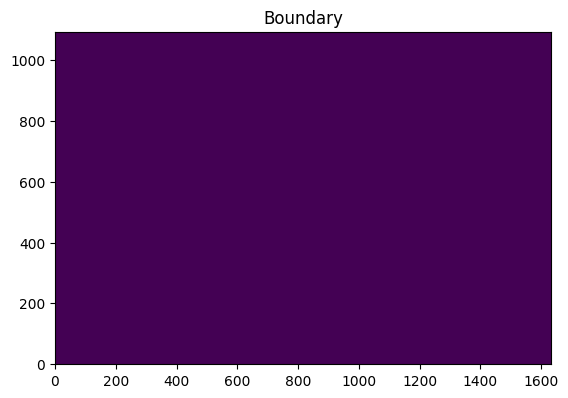

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [8]:
reload(un)
Hbeta = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_sstHa.npy', number_of_frames=ntime,
                 time=time_list, name_of_line='Ha14a', thresh=[0, np.percentile(datacube(0), 99.5)],  boundary_methode='No Boundary', 
                 boundary_arguments = {"error":0.01, "index_of_zero":5}, with_stokes=True, with_time=True)

# Hbeta.datacube
# np.shape(Hbeta.datacube), Hbeta.datacube(0)[0:30:5,10:20:5, 100:200:30], 
Hbeta.boundary


In [9]:
Hbeta.calculate__FOV_spect_over_time()

In [10]:
secs = un.get_TIME(Hbeta)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{Hbeta.shape=}')

the mean cadence is 21.54310344827588 seconds for this line!
Hbeta.shape=(233, '??', 21, 1094, 1632)


The guessed filters are [[3.0, 2.625], [10.0, 2.625], [17.0, 2.625]]


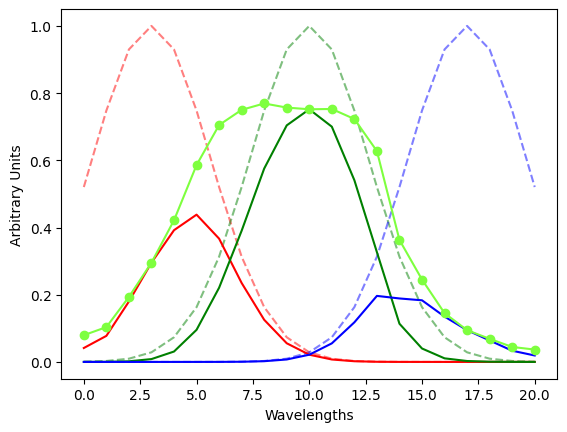

In [11]:
# %matplotlib inline
Hbeta.update_filters(None)
Hbeta.plot_filt(880,900)
plt.show()

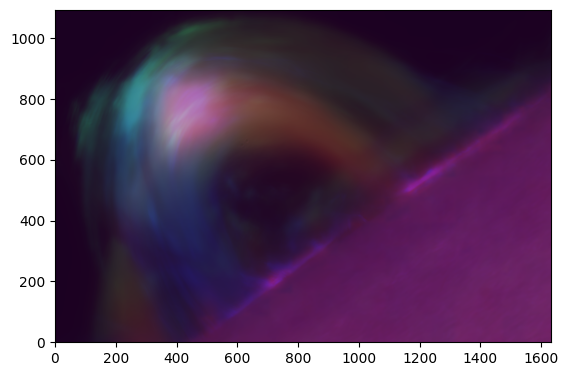

(1094, 1632, 3)


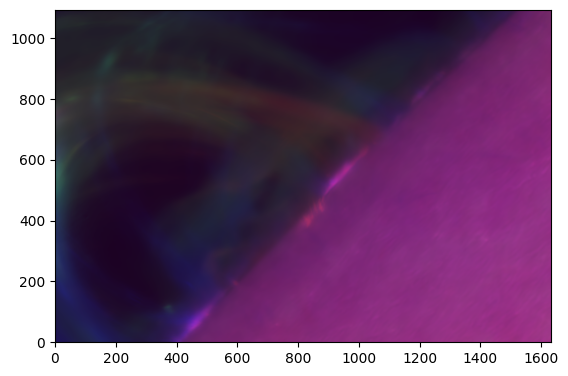

(1094, 1632, 3)


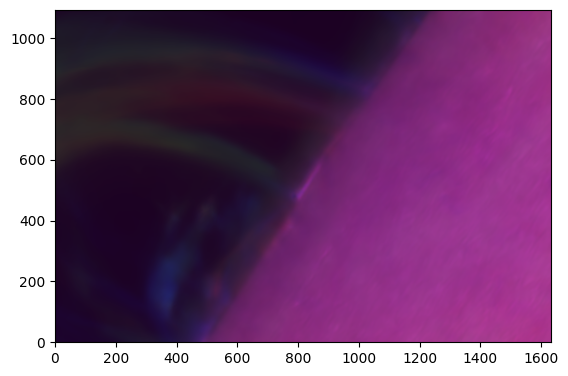

(1094, 1632, 3)


In [12]:
# %matplotlib widget
for frame in range(0,Hbeta._number_of_frames, 100):
    # frame=0
    Hbeta.ccp_frame(frame,Show=False)
    plt.imshow(Hbeta.current_ccp, origin='lower')
    plt.imshow(Hbeta.calculate_boundary(frame=frame, error=0.0005), alpha=0.4, origin="lower")

    # plt.imshow(Hbeta.boundary, origin='lower', alpha=0.2)
    plt.show()
    print(np.shape(Hbeta.current_ccp))#,np.shape(Hbeta.boundary))

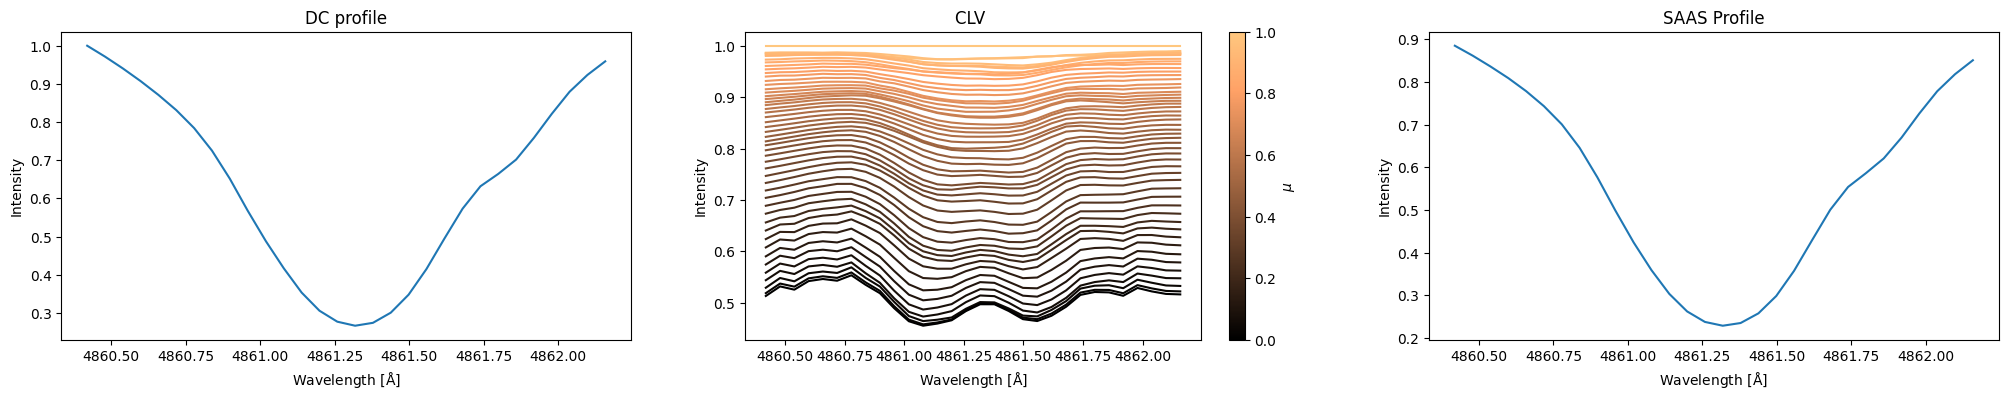

crisp::read_reflectivity: (RL,RH)[4861.288539927959] = (0.9798981569710328, 0.8893072273959524)


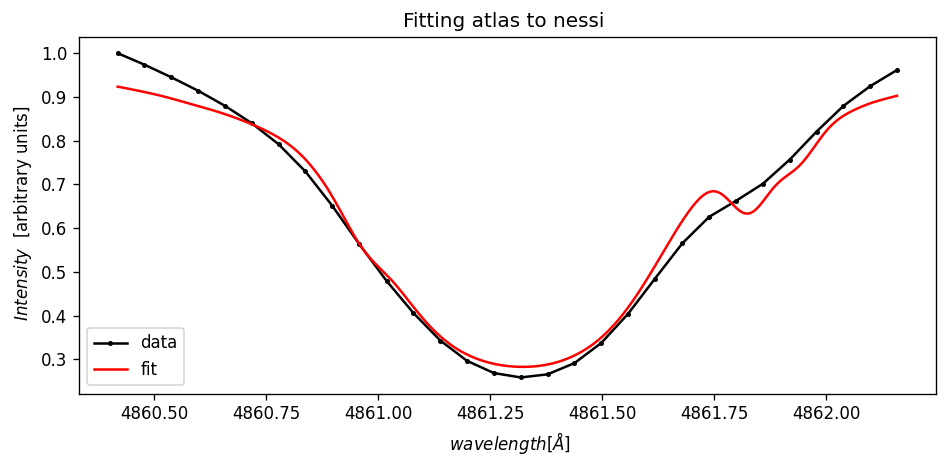

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 184.3050247521254
        x: [-1.377e+00  1.063e-01  1.176e+00]
      nit: 2
      jac: [ 1.406e+02 -4.437e+02  0.000e+00]
 hess_inv: [[ 1.034e-04  9.269e-05  0.000e+00]
            [ 9.269e-05  8.909e-05  0.000e+00]
            [ 0.000e+00  0.000e+00  1.000e+00]]
     nfev: 309
     njev: 75
de p-waarde is  0.9999707715936142 
Chi^2 reduced= 6.826112027856497 
aantal vrijheidgraden= 27 
chi^2= 184.3050247521254
we behouden de fit tot op een betrouwbaarheidsniveau van  0.9999707715936142 
Oftewel verwerp als p-waarde <lpha-niveau 


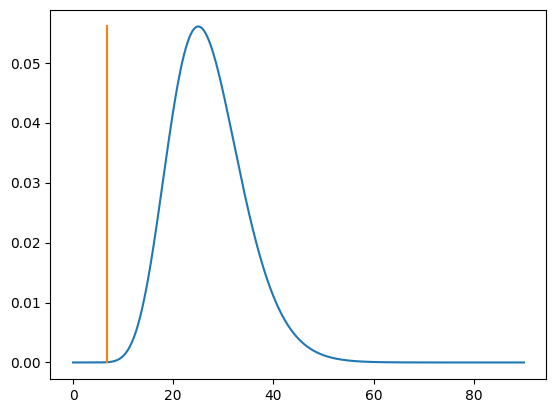

8695


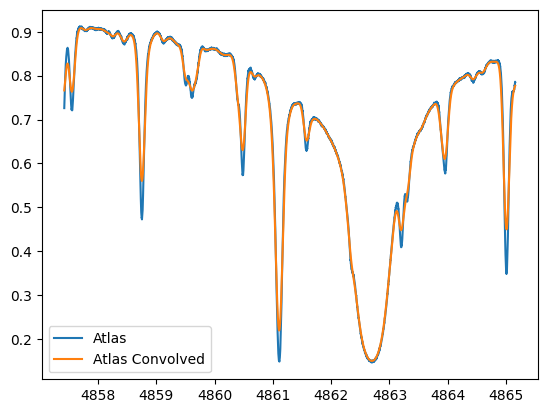

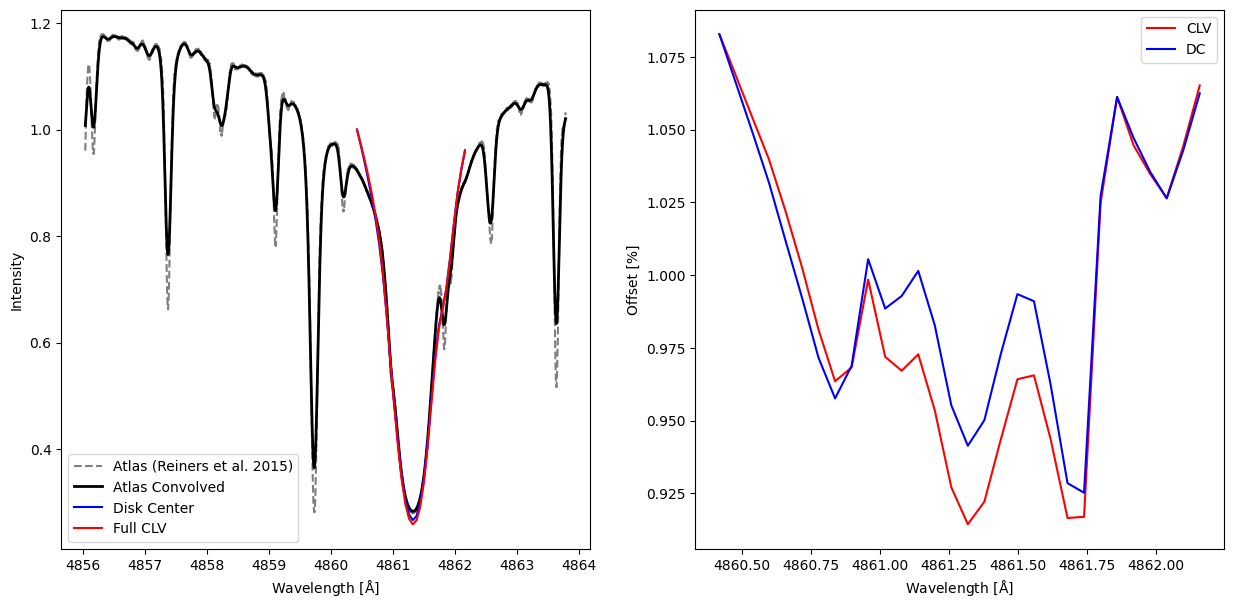

4861.288539927959 4861.288477594625


In [13]:
reload(un)
atlas = f.getdata('D:/solar flares/data/2017-09-06/fits/solar_atlas_V1_405-1065.fits')
theor_Hbeta = un.linestudier('D:/solar flares/data/2017-09-06/fits/4861_clv.fits', atlas=atlas, nr=101)
theor_Hbeta.saas_profile_atlas_check(show_all=True)
print(np.median(theor_Hbeta.sst_wav), np.mean(theor_Hbeta.sst_wav))

## Calculating the $\mu$ !!!!! 


In [14]:
Hbeta.shape

(233, '??', 21, 1094, 1632)

In [15]:
def timeframe_to_extent(frame, timeframe_to_filename_fits, flip=False, invert=False, shift=(0,0)):
    with f.open(timeframe_to_filename_fits(frame)) as io :
        wvl = io[1].data[0][0]
    extent = wvl[0,0:2,0:2, 0:2]
    a,b = shift
    if not flip:
        extent = [extent[0,0, 0]+a, extent[1,1, 0]+a, extent[0,0, 1]+b, extent[1,1, 1]+b]
    else:
        extent = [extent[0,0, 1]+a, extent[1,1, 1]+a, extent[0,0, 0]+b, extent[1,1, 0]+b]
    if invert:
        extent = [extent[1], extent[0], extent[3], extent[2]]
    print(f"extent timeframe {frame} is ", extent)
    return extent

def calculate_mu(x,y, radius=959.63):
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    rad_dist =  (x**2 + y**2)**0.5/radius
    return np.cos(np.arcsin(rad_dist))

import numpy as np

def rotate_mesh_around_average(xx, yy, angle):
  """
  Rotates an xy mesh around its average position.

  Args:
      xx: A 2D NumPy array representing the x-coordinates of the mesh.
      yy: A 2D NumPy array representing the y-coordinates of the mesh.
      angle: The rotation angle in radians. Positive values represent counter-clockwise rotation.

  Returns:
      A tuple of 2D NumPy arrays representing the rotated x and y coordinates (xx_rot, yy_rot).
  """

  # Calculate the average x and y coordinates
  avg_x = np.mean(xx)
  avg_y = np.mean(yy)

  # Shift the mesh to center it around the average
  xx_centered = xx - avg_x
  yy_centered = yy - avg_y

  # Rotate the centered mesh coordinates
  xx_rot = np.cos(angle) * xx_centered -np.sin(angle) * yy_centered  + avg_x
  yy_rot = np.sin(angle) * xx_centered + np.cos(angle) * yy_centered + avg_y

  return xx_rot, yy_rot



def extent_to_grid(extent, shape, invert=False, angle=0):

    x = np.linspace(extent[0], extent[1], shape[4])
    y = np.linspace(extent[2], extent[3], shape[3])
    if invert:
        x = x[::-1]
        y = y[::-1]

    xx, yy = np.meshgrid(x, y)
    if angle != 0:
        xx, yy = rotate_mesh_around_average(xx, yy, angle)

    MU = calculate_mu(xx,yy)
    print("does MU contain nan's?", np.any(np.isnan(MU)))
    return xx, yy, MU


def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]

def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        over.ccp_frame(timeFrame, Show=False)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        K = MU * over.boundary
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 

extent timeframe 0 is  [988.4344139920858, 926.6195139920857, -123.12272070844016, -164.54742070844014]


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_10796\132685048.py:26: RuntimeWarning: invalid value encountered in arcsin
  return np.cos(np.arcsin(rad_dist))


does MU contain nan's? True
does MU contain nan's? True
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.1244639312279822 for timeframe 0
Coundourplot succesfully saved.


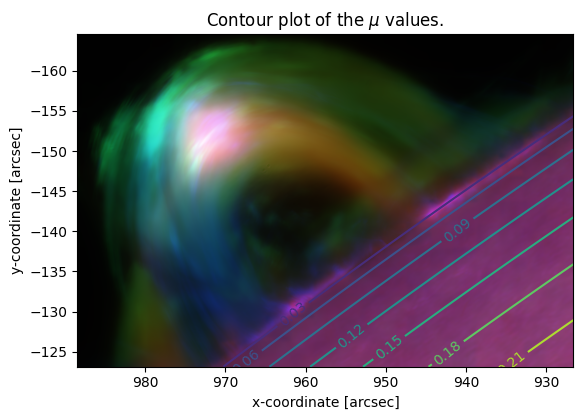

In [16]:

frame = 0
extent = timeframe_to_extent(frame, ttff, invert=True, shift=(-1.2,0))
xx_r, yy_r, MU = extent_to_grid(extent, Hbeta.shape, invert=False, angle=0)
xx, yy, MU = extent_to_grid(extent, Hbeta.shape, invert=False, angle=1.52*np.pi/6)
xx0=xx
yy0=yy

mu = give_mu_contourplot(
    MU,
    xx_r,
    yy_r,
    extent,
    over=Hbeta,
    save=True,
    save_name=Hbeta.name_of_line,
    timeFrame=frame,
)
sst_data = Hbeta
theor_line = theor_Hbeta
set_mu(Hbeta, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_Hbeta.index_mu], theor_line.sst_clv[theor_Hbeta.index_mu][0], clv_fit(mu, theor_line)


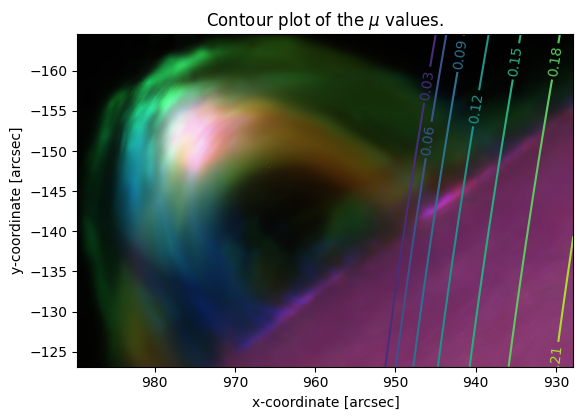

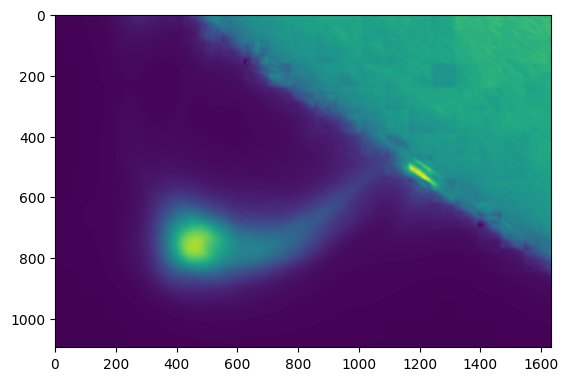

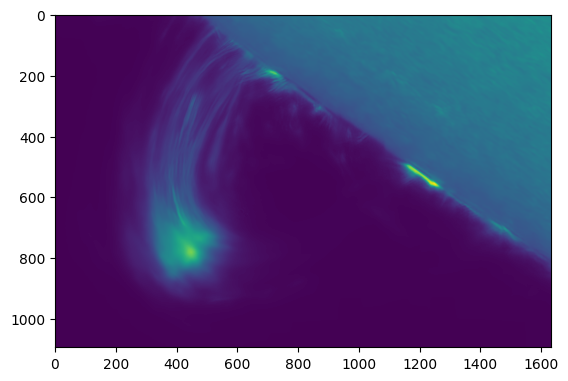

In [17]:
plt.imshow(Hbeta.datacube(0)[0])
plt.show()
plt.imshow(Hbeta.datacube(0)[-1])
plt.show()

-1.016945627371985e-05


c:\Users\Gebruiker\Anaconda3\Lib\site-packages\nessi\integrator.py:382: RuntimeWarning: invalid value encountered in sqrt
  ipts = _np.vstack([_np.atleast_2d(x), _np.atleast_2d(y), _np.atleast_2d(_np.sqrt(1.-(x**2+y**2)))])
c:\Users\Gebruiker\Anaconda3\Lib\site-packages\nessi\integrator.py:358: RuntimeWarning: invalid value encountered in arcsin
  mu = _np.cos(_np.arcsin(rad_dist))


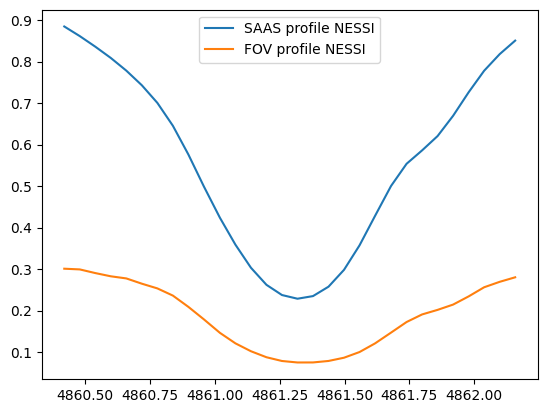

In [18]:
theor_Hbeta.set_fov( xx, yy, Hbeta.boundary, sr=959.63)


## Finding a suitable quiet sun patch

In [19]:
frame, Hbeta.shape

(0, (233, '??', 21, 1094, 1632))

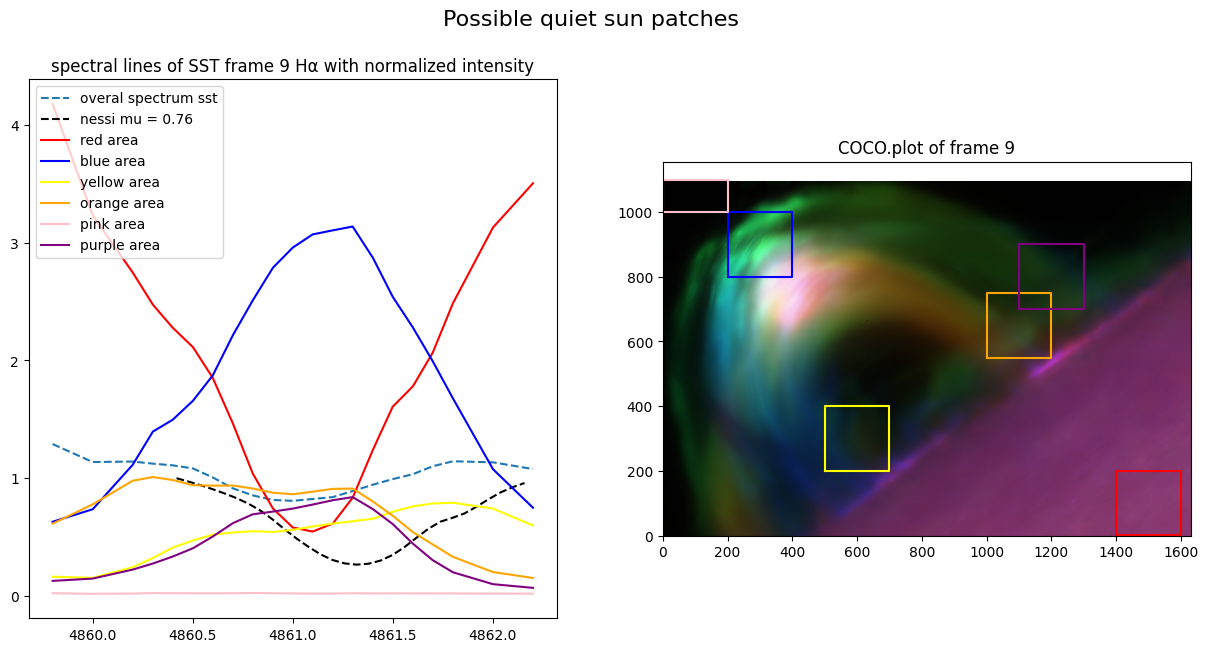

In [20]:
frame=9

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

Hbeta.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(1400,1600),(1,200)], [(200,400), (800, 1000)], [(500, 700), (200, 400)], [(1000,1200),(550,750)],[(0,200),(1000,1100)], [(1100,1300),(700, 900)]]
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title(
    f"spectral lines of SST frame {frame}"
    + " H\u03B1 with normalized intensity"
)
Hbeta.frame_integrated_spect(frame)
ax[0].plot(Hbeta._wavel, Hbeta.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_Hbeta.sst_wav + theta[0], theta[2] * theor_Hbeta.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]


ax[0].plot(theor_Hbeta.sst_wav + theta[0], theta[2] * theor_Hbeta.sst_dc*theor_Hbeta.sst_clv[0] + theta[1], '--', label='nessi mu = 0.76', color='black')

ax[1].imshow(Hbeta.current_ccp,origin='lower')
ax[1].set_title("COCO.plot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(Hbeta._wavel, Hbeta.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_Hbeta.png')
plt.show()


### Choose patch as quiet sun

fill in here which color the wanted quiet sun patch had 

In [21]:
color_wanted_patch = 'red'

In [22]:
np.shape(theor_Hbeta.fov[0])

(1094, 1632)

the edges of the patch are denoted by the xlim: (1400, 1600) and ylim: (1, 200)


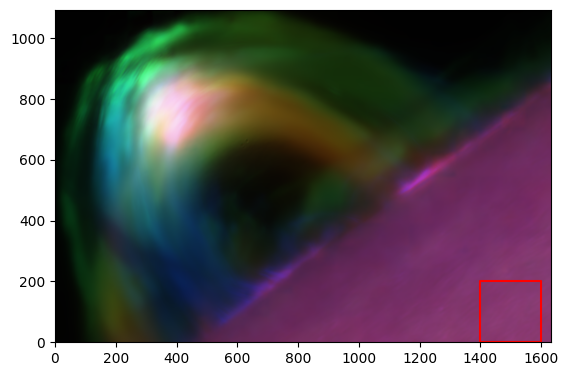

The quiet sun is pick at x (0.9663084883421416, -0.15684881332996348) with average              mu 0.20407438622940327


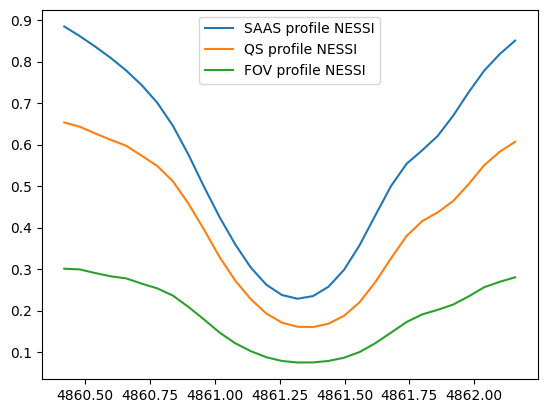

{'frame': 9, 'xlim': (1400, 1600), 'ylim': (1, 200), 'color': 'red'}

In [23]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)
reload(un)
Hbeta.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
plt.show()
theor_Hbeta.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
Hbeta.quiet_sun

[[0.9662644  0.96623677 0.96620914 ... 0.96082074 0.96079311 0.96076548]
 [0.96629262 0.96626499 0.96623735 ... 0.96084896 0.96082133 0.9607937 ]
 [0.96632084 0.9662932  0.96626557 ... 0.96087718 0.96084955 0.96082191]
 ...
 [0.97179506 0.97176743 0.9717398  ... 0.96635141 0.96632377 0.96629614]
 [0.97182328 0.97179565 0.97176801 ... 0.96637962 0.96635199 0.96632436]
 [0.9718515  0.97182387 0.97179623 ... 0.96640784 0.96638021 0.96635258]] [[-0.15130551 -0.15133373 -0.15136195 ... -0.15686439 -0.15689261
  -0.15692083]
 [-0.15133314 -0.15136136 -0.15138958 ... -0.15689202 -0.15692024
  -0.15694846]
 [-0.15136078 -0.15138899 -0.15141721 ... -0.15691966 -0.15694787
  -0.15697609]
 ...
 [-0.15672154 -0.15674975 -0.15677797 ... -0.16228041 -0.16230863
  -0.16233685]
 [-0.15674917 -0.15677739 -0.1568056  ... -0.16230805 -0.16233627
  -0.16236448]
 [-0.1567768  -0.15680502 -0.15683324 ... -0.16233568 -0.1623639
  -0.16239212]]
the avarage position is ((0.9663084883421416, -0.1568488133299634

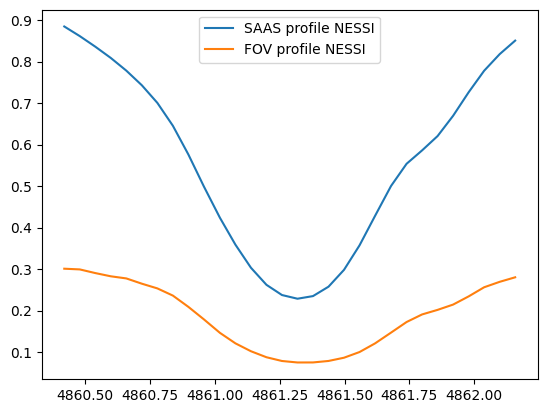

In [24]:
self = theor_Hbeta

a, b = xlim
c, d = ylim
X = self.fov[0][c:d, a:b]
Y = self.fov[1][c:d, a:b]
print(X, Y)
boundary = self.fov[2][c:d-1, a:b-1]
qs_spectra = np.array([boundary for _ in range(len(self.sst_wav))])
dx = (X[1:,1:] - X[0:-1,0:-1])
dy = (Y[1:,1:] - Y[0:-1,0:-1])
areafactor = np.nansum(dx*dy+boundary) /np.pi
x0, y0 = np.nanmean(X), np.nanmean(Y)
print(f"the avarage position is ({x0,y0}) yielding averge mu={calculate_mu(x0,y0, radius=1)}")
self.spectr_qs = -self.saas.get_diff_spectra_fov(X,Y,qs_spectra) / areafactor
plt.plot(self.sst_wav, self.saas_profile, label="SAAS profile NESSI")
plt.plot(self.sst_wav, self.spectr_fov, label="FOV profile NESSI")
plt.legend()
plt.show()

[4859.79946 4859.99955 4860.19964 4860.30062 4860.39973 4860.50071
 4860.59982 4860.7008  4860.79991 4860.90089 4861.      4861.09911
 4861.20009 4861.2992  4861.40018 4861.49929 4861.60027 4861.69938
 4861.80036 4862.00045 4862.20054]
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 2736.615341656587
        x: [-2.900e-01 -2.229e-01  4.625e+00]
      nit: 11
      jac: [ 5.493e-04  0.000e+00  6.104e-05]
 hess_inv: [[ 1.717e-05 -6.378e-06  1.398e-05]
            [-6.378e-06  7.673e-06 -2.541e-06]
            [ 1.398e-05 -2.541e-06  1.271e-05]]
     nfev: 240
     njev: 57


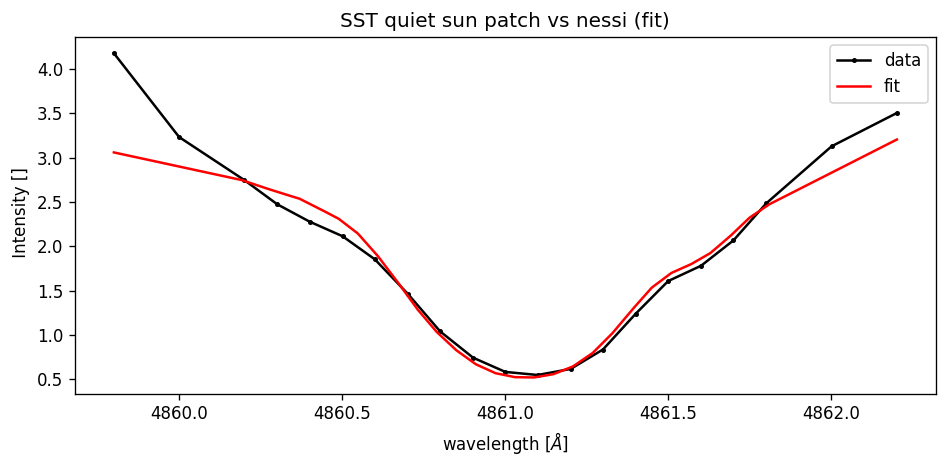

de p-waarde is  2.989040868652646e-23 
Chi^2 reduced= 152.03418564758817 
aantal vrijheidgraden= 18 
chi^2= 2736.615341656587
we behouden de fit tot op een betrouwbaarheidsniveau van  2.989040868652646e-23 
Oftewel verwerp als p-waarde <lpha-niveau 


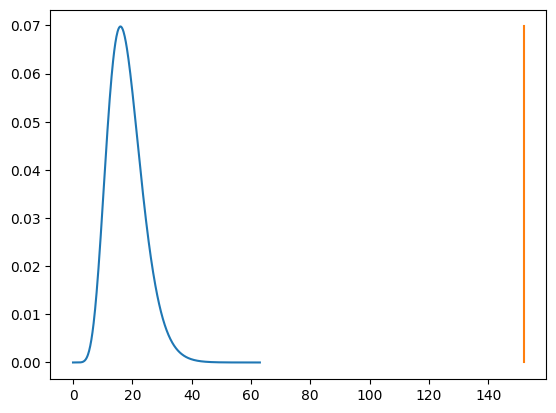

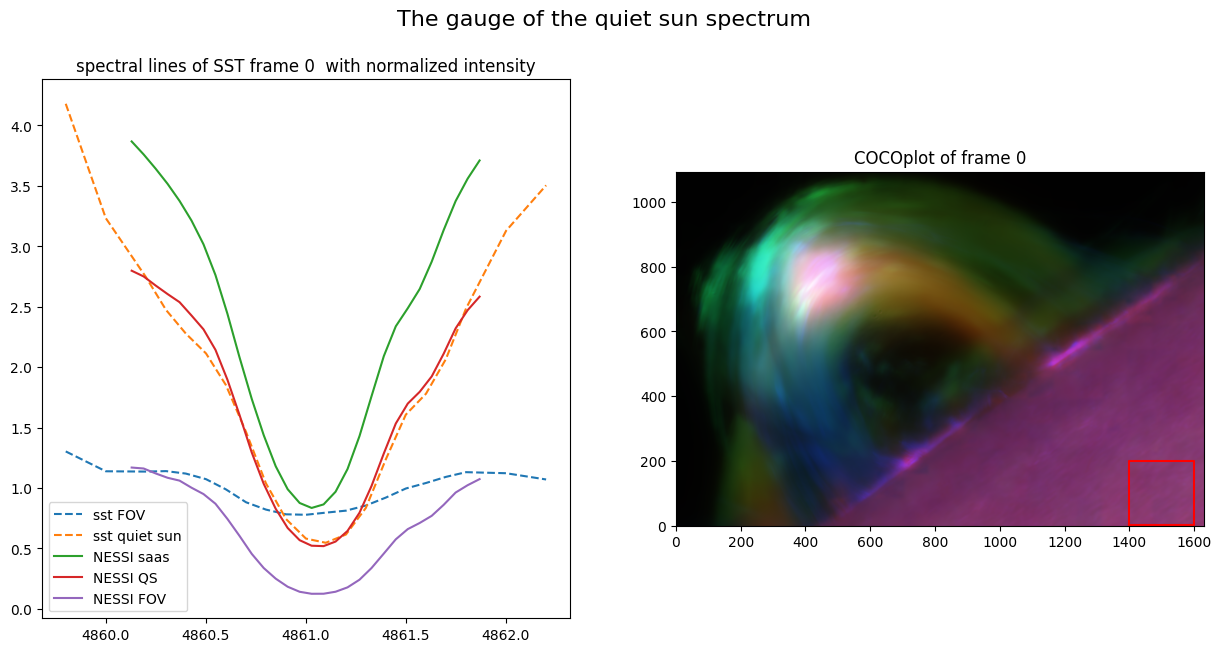

In [25]:
reload(un)
un.fit_qs_to_NESSI(theor_Hbeta, Hbeta)

## The full FOV integrated spectrum over time:

In [26]:
Hbeta.calculate__FOV_spect_over_time()

# Figure 4 In HARPS ALEX
![image.png](attachment:image.png)

Now we do it for the FOV spectum with as normalisation the quiet sun

[4.17927824 3.23292355 2.74692828 2.47357644 2.27787256 2.11342902
 1.85241835 1.4633736  1.03942492 0.74247173 0.58153256 0.5468212
 0.61513688 0.83420995 1.2403785  1.60717359 1.78034306 2.06608033
 2.48545241 3.12835193 3.50436319] [1.2126105  1.18630192 1.15403501 1.08942213 1.03026996 0.93288987
 0.76058127 0.52402681 0.3219441  0.19191975 0.13262537 0.12816198
 0.17308266 0.29168661 0.47892614 0.64614961 0.74175939 0.87928611
 1.01521028 1.18527166 1.35401083] [2.96666774 2.04662163 1.59289327 1.38415431 1.2476026  1.18053915
 1.09183708 0.93934679 0.71748082 0.55055198 0.44890718 0.41865922
 0.44205422 0.54252334 0.76145236 0.96102398 1.03858366 1.18679422
 1.47024213 1.94308027 2.15035236]


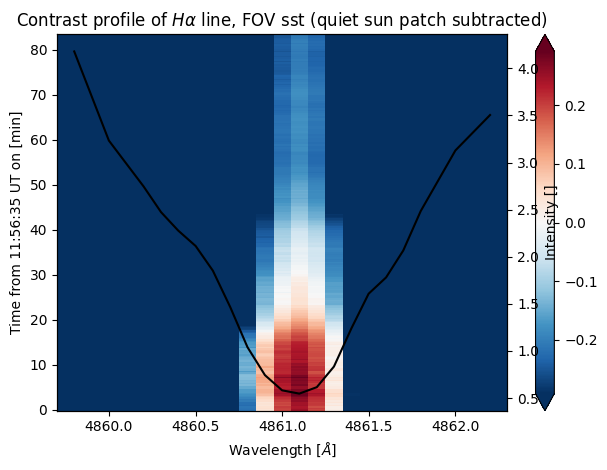

In [27]:
TIME = un.get_TIME(Hbeta)

FOV_spectrum = Hbeta.FOV_spectrum
QS = sst_data.quiet_spect
QS2 = theor_line.adapted_fov_spectr()(sst_data._wavel)
print(QS, QS2, QS - QS2)
Z = FOV_spectrum - QS
x = sst_data._wavel
y = Hbeta.TIME
TIME = y
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, FOV sst (quiet sun patch subtracted)')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,QS, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

[-1.37655439  0.10628399  1.17647059]
[[1.30269158 1.13845138 1.13587336 ... 1.13102631 1.12232231 1.07057212]
 [1.35597251 1.18400191 1.1643885  ... 1.13048859 1.13719421 1.08521274]
 [1.34328351 1.18914365 1.16543313 ... 1.13370809 1.13361522 1.06696365]
 ...
 [1.77394991 1.37533426 1.19101278 ... 1.0648624  1.2521959  1.34457111]
 [1.75117433 1.35967907 1.17952222 ... 1.05594107 1.24963922 1.3288288 ]
 [1.77930102 1.37654158 1.1927802  ... 1.07908823 1.26789969 1.34742565]] [1.2126105  1.18630192 1.15403501 1.08942213 1.03026996 0.93288987
 0.76058127 0.52402681 0.3219441  0.19191975 0.13262537 0.12816198
 0.17308266 0.29168661 0.47892614 0.64614961 0.74175939 0.87928611
 1.01521028 1.18527166 1.35401083]


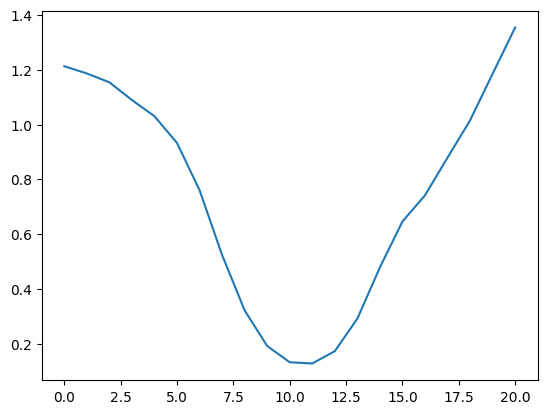

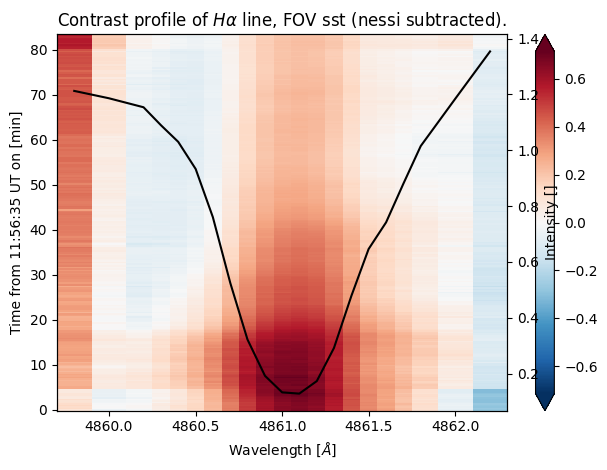

In [28]:
theta = theor_Hbeta.theta
print(theta)
theor_line = theor_Hbeta

sst_data = Hbeta
QS = theor_Hbeta.adapted_fov_spectr()(sst_data._wavel)
plt.plot(QS)
print(FOV_spectrum, QS)
Z = FOV_spectrum - QS
x = sst_data._wavel
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, FOV sst (nessi subtracted).')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,QS, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [29]:
Hbeta.stand_dev_quiet_sun()

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

In [30]:
reload(un)
un.save_for_further_analysis(Hbeta, theor_Hbeta)
